# Цель исследования

Наше исследование предполагает две основных части, в первой мы приоретизируем имеющиеся гипотезы, во второй проведём A\B тестирование, построим графики и сделаем вывод по итогам проведённого теста. 

In [1]:
#для начала импортируем библиотеки, необходимые нам для исследования
import pandas as pd
from scipy import stats as st
import numpy as np
import math as mth
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import warnings

## Приоритизация гипотез.

В нашем распоряжении имеется датасет с гипотезами по увеличению выручки интернет-магазина и их оценками по различным параметрам:
- **Hypothesis** — краткое описание гипотезы;
- **Reach** — охват пользователей по 10-балльной шкале;
- **Impact** — влияние на пользователей по 10-балльной шкале;
- **Confidence** — уверенность в гипотезе по 10-балльной шкале;
- **Efforts** — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [2]:
try:
    data = pd.read_csv('/datasets/hypothesis.csv')
except:
    data = pd.read_csv('https://raw.githubusercontent.com/Cellport/Projects/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20A-B%20%D1%82%D0%B5%D1%81%D1%82%D0%B0/hypothesis.csv')

In [3]:
data

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
#приведём названия столбцов датафрейма к строчному виду для удобства расчётов
data.columns = data.columns.str.lower()

**Задачи первой части исследования:**

1. Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

2. Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.

3. Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

1. Применим фреймворк ICE для приоритизации гипотез.

In [5]:
#рассчитаем ICE score и выведем на экран с сортировкой по убыванию приоритета

data['ice'] = data['impact']*data['confidence']/data['efforts']
pd.options.display.max_colwidth = 120
data[['hypothesis', 'ice']].sort_values(by='ice', ascending=False)

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


Методика ICE показала наивысший приоритет у девятой гипотезы: *Запустить акцию, дающую скидку на товар в день рождения*. 

2. Применим фреймворк RICE для приоритизации гипотез.

In [6]:
#рассчитаем RICE score и выведем на экран с сортировкой по убыванию приоритета
data['rice'] = data['reach']*data['impact']*data['confidence']/data['efforts']
pd.options.display.max_colwidth = 120
data[['hypothesis', 'rice']].sort_values(by='rice', ascending=False)

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Методика RICE показадала наивысший приоритет у восьмой гипотезы: *Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*

3. Укажем, как изменилась приоритизация гипотез при применении RICE вместо ICE и определим почему так произошло.

Приоритетность гипотез при использовании различных фреймворков отличается. Очевидно, что при использовании методики RICE на высший приоритет повлиял показатель *reach*, который у восьмой гипотезы: *Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок* максимальный и составляет - 10 баллов.

## Анализ A/B-теста

#### Предобработка данных

В нашем распоряжении имеются два датафрейма с результатами A/B-теста. Для начала изучим их содержимое, проверим на наличие пропусков, определим их природу. Проверим правильность типов данных в датафреймах, при необходимости проведём их типизацию. Также устраним дубликаты, если такие имеются.

In [7]:
#изучим датафрейм с заказами

try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('https://raw.githubusercontent.com/Cellport/Projects/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20A-B%20%D1%82%D0%B5%D1%81%D1%82%D0%B0/orders.csv')

#нормализуем названия столбцов датафрейма для удобства
orders.columns =  orders.columns.str.lower()

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionid  1197 non-null   int64 
 1   visitorid      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
try:
    visitors = pd.read_csv('/datasets/visitors.csv')
except:
    visitors = pd.read_csv('https://raw.githubusercontent.com/Cellport/Projects/main/%D0%90%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7%20A-B%20%D1%82%D0%B5%D1%81%D1%82%D0%B0/visitors.csv')


visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
#проверим датафреймы на дубликаты
print('Количество дубликатов в таблице посещений: ', visitors.duplicated().sum())
print('Количество дубликатов в таблице заказов: ', orders.duplicated().sum())

Количество дубликатов в таблице посещений:  0
Количество дубликатов в таблице заказов:  0


Строк с пропусками и дубликатов в обоих датафреймах нет. Типы данных нужно изменить только в столбцах с  датами у обеих таблиц. 

In [10]:
#приведём даты к нужному типу
orders['date'] = pd.to_datetime(orders['date'], errors="coerce", dayfirst=True )
visitors['date'] = pd.to_datetime(visitors['date'], errors="coerce", dayfirst=True )

Для исследования у нас в наличии имеется датафреймы с информацией о заказах и с данными посещений, полученные по итогам A/B-теста. Датафреймы требовали минимальной предобработки в части приведения даты к нужному типу. В остальном у нас в распоряжении нормализованные данные.

**Для анализа A/B-теста нам предстоит выполнить ряд задач:**

1. Построить график кумулятивной выручки по группам. Сделать выводы и предположения.
2. Построить график кумулятивного среднего чека по группам. Сделать выводы и предположения.
3. Построить график относительного изменения кумулятивного среднего чека группы B к группе A. Сделать выводы и предположения.
4. Построить график кумулятивного среднего количества заказов на посетителя по группам. Сделать выводы и предположения.
5. Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A. Сделать выводы и предположения.
6. Построить точечный график количества заказов по пользователям. Сделать выводы и предположения.
7. Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8. Построить точечный график стоимостей заказов. Сделать выводы и предположения.
9. Посчитать 95-й и 99-й перцентили стоимости заказов. ВЫбрать границу для определения аномальных заказов.
10. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. Сделать выводы и предположения.
11. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным. Сделать выводы и предположения.
12. Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. Сделать выводы и предположения.
13. Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. Сделать выводы и предположения.
14. Принять решение по результатам теста и объясните его.
    Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

In [11]:
#предварительно изучим сроки проведения теста
print('Дата начала теста:', orders['date'].min())
print('Дата окончания теста:', orders['date'].max())


#посчитаем сколько пользователей в каждой группе
print('Количество пользователей в группе A', orders[orders['group'] == 'A']['visitorid'].count())
print('Количество пользователей в группе B', orders[orders['group'] == 'B']['visitorid'].count())

#проверим и наличие одних и тех же пользователей в обеих группах
intersected = np.intersect1d(orders.query('group == "A"')['visitorid'].unique(), orders.query('group == "B"')['visitorid'].unique())
print(intersected.sum())
#отфильтруем дублирующихся пользователей из датафрейма с заказами
orders = orders.query('visitorid not in @intersected')

Дата начала теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00
Количество пользователей в группе A 557
Количество пользователей в группе B 640
135574526494


Исходя из наших данных можно сразу обозначить, что тест длился с 1 по 31 августа 2019 года и в тестировании участвовали две группы пользователей - A и B, в первой было 468 пользователей, во второй - 548. При этом были пересекающиеся пользователи в обеих группах, которых мы удалили.

1. Построим график кумулятивной выручки по группам.

In [12]:
#соберём кумулятивные данные необходимые для построения графика
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],\
                   orders['group'] == x['group'])]\
                   .agg({'date' : 'max', 'group' : 'max', 'transactionid' : 'nunique', 'visitorid' : 'nunique', 'revenue' : 'sum'}),\
                   axis=1).sort_values(by=['date','group'])



visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],\
                     visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}),\
                     axis=1).sort_values(by=['date','group'])


cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']


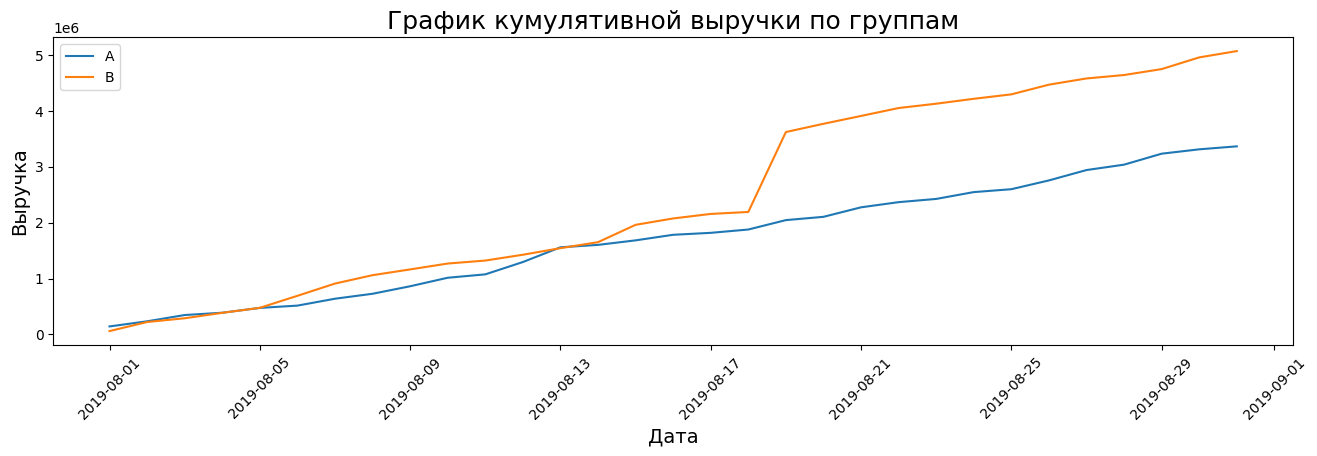

In [13]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

#построим график выручки группы А
plt.figure(figsize=(16, 4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
#построим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам', fontsize=18)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Выручка', fontsize=14)
plt.xticks(rotation = 45)
plt.legend();

Показатели выручки группы B практически на протяжении всего тестирования были выше, чем в группе A (отставая ненамного только в самом начале эксперимента). Ближе к середине теста показатели обеих групп сближались, но выручка в группе A всё равно не превысила значения группы B. Во второй половине эксперимента разрыв по выручке между группами резко увеличился за счёт скачка показателя групы B. Возможно это влияние аномальных заказов, которые в дальнейшем нужно будет удалить.

2. Построим график кумулятивного среднего чека по группам.

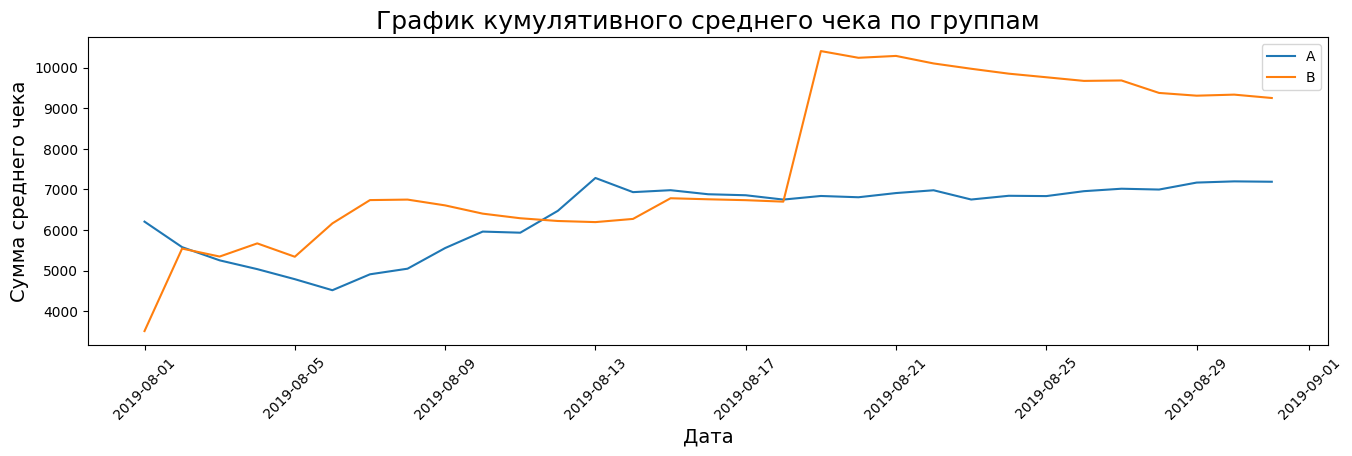

In [14]:
#для того, чтобы найти средний чек, нужно кумулятивный показатель выручки разделить на кумулятивный показатель количества заказов по состоянию на конкретную дату
cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]
plt.figure(figsize=(16, 4))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('График кумулятивного среднего чека по группам', fontsize=18)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Сумма среднего чека', fontsize=14)
plt.xticks(rotation = 45)
plt.legend() ;

На графике также видны неоднозначные колебания, на основе которых сложно сделать конкретный вывод. Но, самое важное, что здесь тоже виден резкий скачок показателя среднего чека в группе B во второй половине теста. Средний чек для группы A становится равномерным ближе к концу теста, в то же время в группе B заметно падение после резкого всплеска. Это ещё больше подтверждает предположение о влиянии выбросов на показатели. Их предстоит обработать в дальнейшем.

3. Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

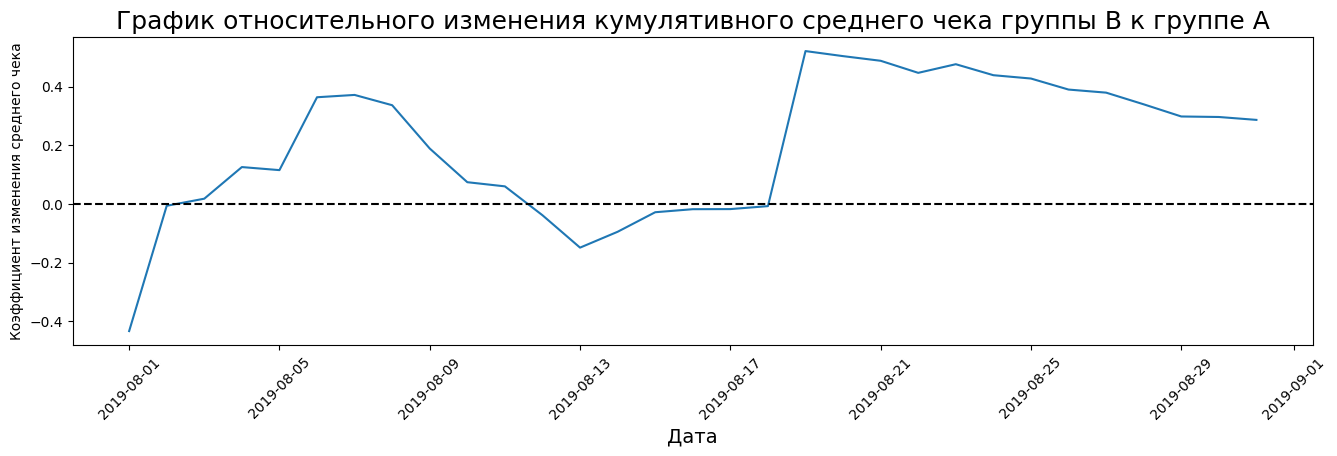

In [15]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(16, 4))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)


plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', fontsize=18)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Коэффициент изменения среднего чека', fontsize=10)
plt.xticks(rotation = 45)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');

На графике присутствуют резкие изменения результатов теста. Вероятно в эти периоды были совершены аномальные заказы.

4. Построим график кумулятивного среднего количества заказов на посетителя по группам.

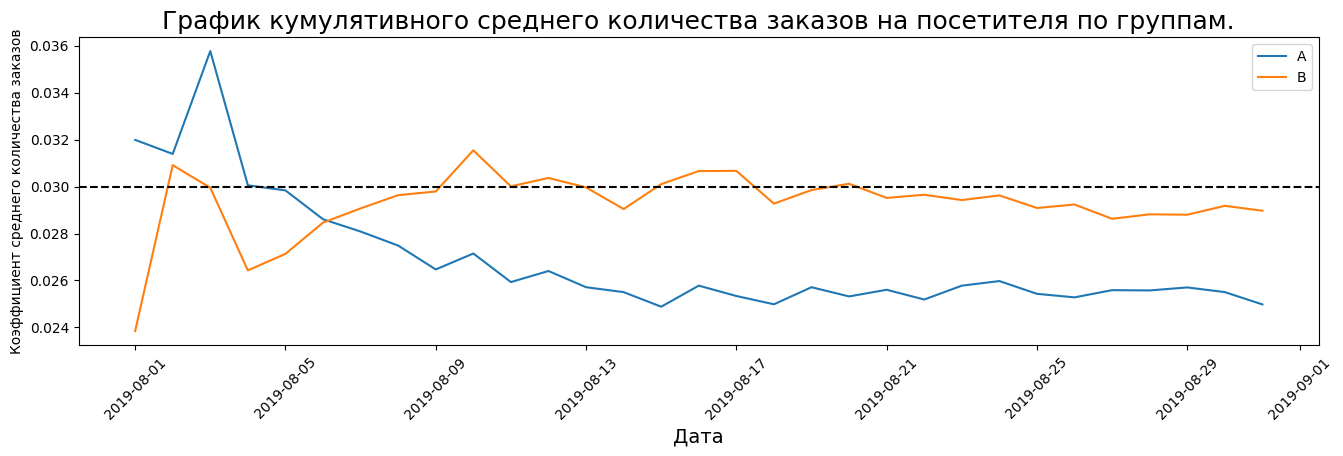

In [16]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(16, 4))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.title('График кумулятивного среднего количества заказов на посетителя по группам.', fontsize=18)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Коэффициент среднего количества заказов', fontsize=10)
plt.xticks(rotation = 45)

plt.legend()
plt.axhline(y=0.03, color='black', linestyle='--');

В начале теста заметны колебания, в этот период группа A даже имела большее среднее число заказов. Но довольно быстро показатели группы B стали выше и ближе к концу теста выровнялись около отметки **0.03**

5. Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.

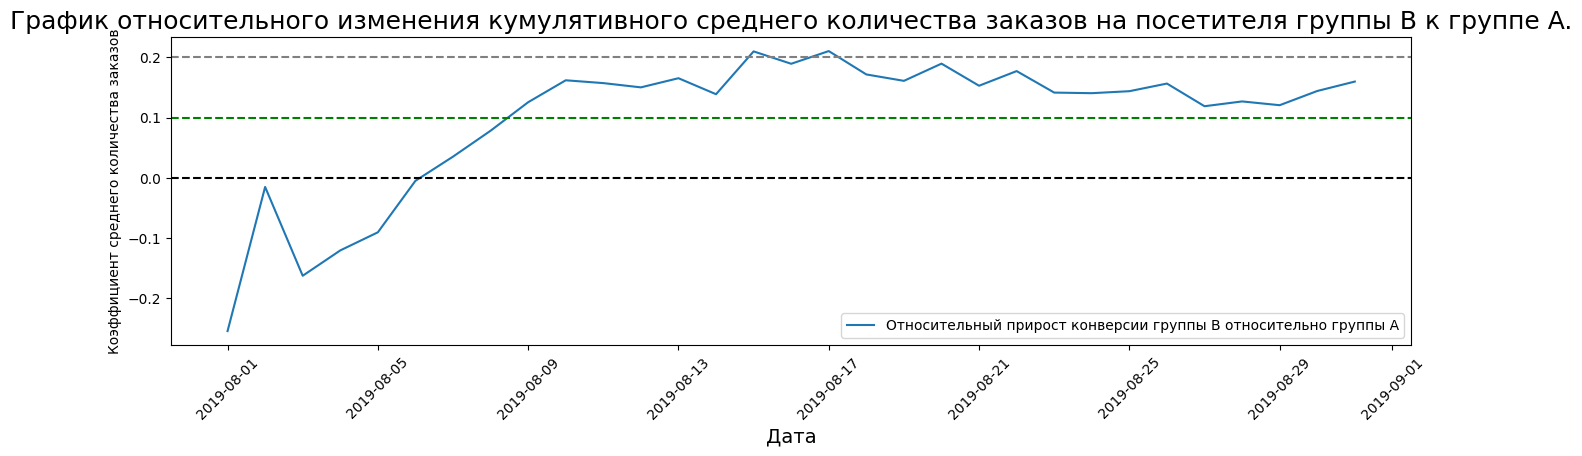

In [17]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(16, 4))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.', fontsize=18)
plt.xlabel('Дата', fontsize=14)
plt.ylabel('Коэффициент среднего количества заказов', fontsize=10)
plt.xticks(rotation = 45)

plt.legend()

plt.axhline(y=0.10, color='green', linestyle='--')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.20, color='grey', linestyle='--');

При небольших колебаниях графика на старте теста, практически с самого его начала заметно, что группа B лидирует по показателю конверсии.

6. Построим точечный график количества заказов по пользователям.

      visitorid  transactionid
908  3967698036              3
55    249864742              3
478  2108163459              3
687  2988190573              3
890  3908431265              3
138   611059232              3
632  2742574263              3
157   678354126              2
323  1404560065              2
452  1985475298              2


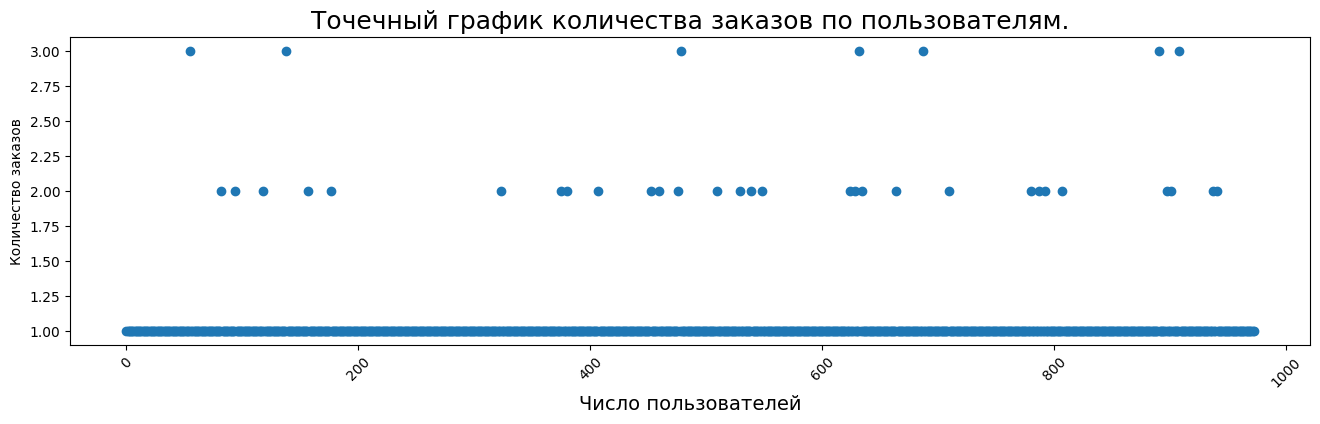

In [18]:
#сгруппируем заказы по пользователям
ordersByUsers = (
    orders.groupby('visitorid', as_index=False)
    .agg({'transactionid': 'nunique'})
)
ordersByUsers.columns = ['visitorid', 'transactionid']

print(ordersByUsers.sort_values(by='transactionid', ascending=False).head(10))



# серия из чисел от 0 до количества наблюдений в ordersByUsers
plt.figure(figsize=(16, 4))
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.title('Точечный график количества заказов по пользователям.', fontsize=18)
plt.xlabel('Число пользователей', fontsize=14)
plt.ylabel('Количество заказов', fontsize=10)
plt.xticks(rotation = 45)

plt.scatter(x_values, ordersByUsers['transactionid']);

На графике мы наблюдаем что количество заказов в основном концентрируется на уровне 1-2. Есть и клиенты с бОльшим количеством заказов, для корректных расчетов и проведения теста нам предстоит определить что считать аномальными показателями.

7. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя. Выберем границу для определения аномальных пользователей.

In [19]:
print(np.percentile(ordersByUsers['transactionid'], [95, 99])) 

[1. 2.]


Только 5% пользователей совершали больше одного заказа и не более 1% пользователей совершали более двух заказов.

8. Построим точечный график стоимостей заказов.

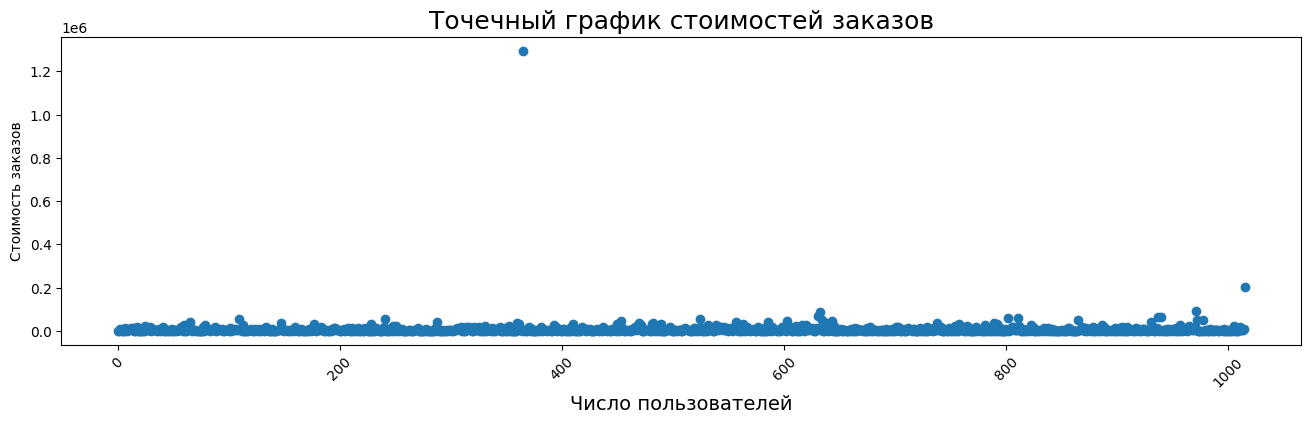

In [20]:
plt.figure(figsize=(16, 4))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])

plt.title('Точечный график стоимостей заказов', fontsize=18)
plt.xlabel('Число пользователей', fontsize=14)
plt.ylabel('Стоимость заказов', fontsize=10)
plt.xticks(rotation = 45);

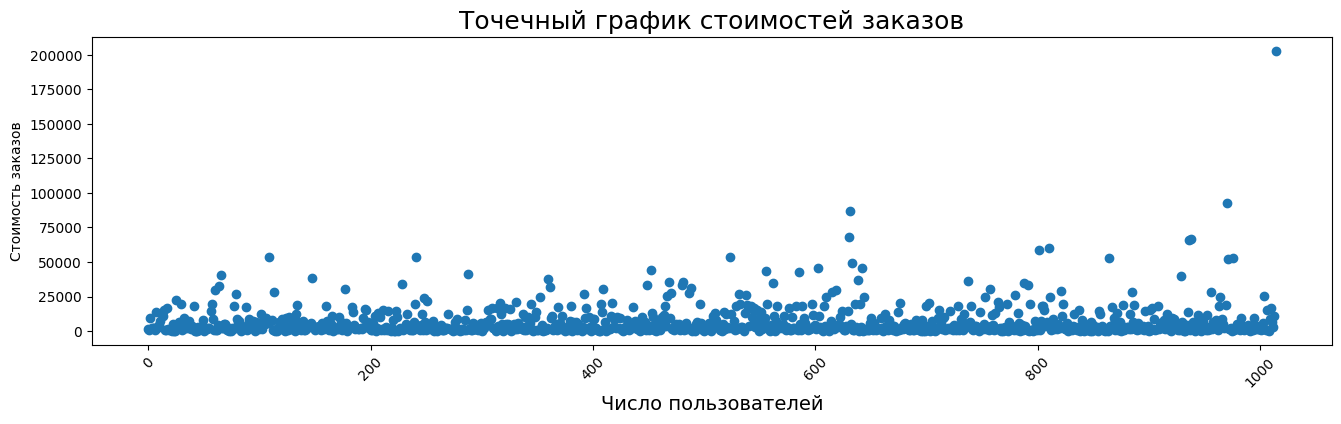

In [21]:
#Из-за выброса выручки размером 1294500 график получился неинформативным. Исключим максимальное значение и построим новый график

orders2 = orders.query('revenue < 1294500')

plt.figure(figsize=(16, 4))
x_values = pd.Series(range(0, len(orders2['revenue'])))
plt.scatter(x_values, orders2['revenue'])

plt.title('Точечный график стоимостей заказов', fontsize=18)
plt.xlabel('Число пользователей', fontsize=14)
plt.ylabel('Стоимость заказов', fontsize=10)
plt.xticks(rotation = 45);

Для лучшего понимания того что можно считать аномальными значениями посчитаем перцентили. 

9. Посчитаем 95-й и 99-й перцентили стоимости заказов. Выберем границу для определения аномальных заказов.

In [22]:
print(np.percentile(orders['revenue'], [95, 99])) 

[26785. 53904.]


Не более чем у 5% заказов чек выше 26000 и не больше чем у 1% заказов чек выше 58233.2

Исходя из полученных графиков и рассчитанных перцентилей, разумно определить в качестве границ аномалий стоимость заказов около 26000 и от 2 заказов на пользователя.

10. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.

Сформулируем гипотезы:
- **нулевая** - различий в среднем количестве заказов между группами нет,
- **альтернативная** - различия в среднем между группами есть.

In [23]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionid', 'visitorid', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionid': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

print(data.head(5))
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorid', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorid', as_index=False)
    .agg({'transactionid': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorid', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)




print("{0:.5f}".format(st.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

        date  ordersPerDateA  revenuePerDateA  ordersPerDateB  \
0 2019-08-01              23           142779              17   
1 2019-08-02              19            91602              23   
2 2019-08-03              24           112473              14   
3 2019-08-04              11            41176              14   
4 2019-08-05              22            86383              21   

   revenuePerDateB  ordersCummulativeA  revenueCummulativeA  \
0            59758                  23               142779   
1           162043                  42               234381   
2            67049                  66               346854   
3            96890                  77               388030   
4            89908                  99               474413   

   ordersCummulativeB  revenueCummulativeB  visitorsPerDateA  \
0                  17                59758               719   
1                  40               221801               619   
2                  54               28

P-Value меньше 0.05, поэтому мы вынуждены отвергнуть нулевую гипотезу. Анализ "сырых данных" показал, что в среднем количестве заказов между группами есть статистически значимые различия. Относительный прирост среднего группы B к конверсии группы A равен 13.8.

11. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.

In [24]:
print('{0:.3f}'.format(st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1))

0.829
0.287


P-Value больше 0.05 - статистически значимых отличий в среднем чеке между группами нет. Относительное различие среднего чека между сегментами 25.9%. Существенная относительная разница при отсутствии статистической значимости указывает на влияние выбросов на метрику. 

12. Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

In [25]:
#Прежде подготовим данные очищенные от аномалий. Опираясь на рассчитанные ранее перцентили за аномальных пользователей возьмем тех пользователей, кто совершил 2 заказа или более или совершил заказ на сумму более 26000.

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 1]['visitorid'],
        ordersByUsersB[ordersByUsersB['orders'] > 1]['visitorid'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 26000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))

568     113298937
1099    148427295
461     154576532
928     204675465
33      249864742
Name: visitorid, dtype: int64


Мы получили список саномальными пользователями, удалив которых сможем посчитать статистическую значимость и выясним есть ли существенные различия между группами с очищенными данными.

In [26]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorid'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
) 

print('{0:.3f}'.format(st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.017
0.172


Полученные показатели свидетельствуют, что группа B лучше группы A.

13. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.

In [27]:
usersWithExpensiveOrders = orders[orders['revenue'] > 26000]['visitorid']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(
    '{0:.3f}'.format(
        st.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorid'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorid'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

0.693
-0.042


Отмечается статистическая значимость различия среднего чека заказов между группами, различие в 6.9% по выручке не является статистически значимым.

14. Принять решение по результатам теста и объясните его.
    Варианты решений:
    1. Остановить тест, зафиксировать победу одной из групп.
    2. Остановить тест, зафиксировать отсутствие различий между группами.
    3. Продолжить тест.

Есть статистически значимое различие по конверсии между группами как по сырым данным, так и после фильтрации аномалий. По сырым данным нет статистически значимого различия по среднему чеку между группами. Но после удаления аномалий отмечается статистически значимое различие.

Исходя из этого принимаем решение признать тест успешным остановить его.